In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

In [111]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

In [3]:
from sklearn import set_config
set_config(print_changed_only=False)

# IMPORTING DATA

In [4]:
pricepred = pd.read_csv('fixprice.csv',index_col=1)

In [5]:
pricepred.head()

,Unnamed: 0,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,host_is_superhost,property_type,bedrooms,beds,guests_included,review_scores_rating,instant_bookable,bathrooms,security_deposit,cleaning_fee,len_amenities
id,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,0,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,84,180,1,0.01,2,365,f,Apartment,1.0,1.0,1,94.0,f,1.0,0.0,0.0,8
50646,1,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,0.24,1,365,f,Apartment,1.0,1.0,2,91.0,f,1.0,0.0,0.0,12
56334,2,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,70,6,20,0.18,2,365,f,Apartment,1.0,1.0,1,98.0,f,1.0,0.0,0.0,9
71609,3,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,167,90,20,0.19,8,365,f,Villa,2.0,3.0,4,89.0,t,1.0,279.0,56.0,27
71896,4,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,95,90,24,0.22,8,365,f,House,1.0,1.0,1,83.0,t,0.5,139.0,28.0,24


In [6]:
pricepred.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
pricepred.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,len_amenities
count,6.954000e+03,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000
mean,1.045947e+08,1.314706,103.847462,129.803135,20.448806,12.718723,0.472921,44.466926,193.476416,1.254817,1.895743,1.798821,54.513230,1.505896,155.063561,27.054501,20.788898
std,9.557451e+07,0.031183,0.043527,80.305075,40.369565,32.043364,1.116076,76.498831,159.249611,0.766258,2.429427,1.337354,45.353699,1.145892,412.253574,37.893016,9.079020
min,2.366600e+04,1.245260,103.665470,14.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500662e+07,1.296385,103.837922,60.000000,2.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,14.000000
50%,6.640618e+07,1.311340,103.849975,119.000000,4.000000,1.000000,0.090000,10.000000,181.000000,1.000000,1.000000,1.000000,80.000000,1.000000,0.000000,20.000000,20.000000
75%,1.703783e+08,1.323213,103.865775,176.000000,18.000000,8.000000,0.430000,52.000000,363.000000,1.000000,2.000000,2.000000,96.000000,2.000000,200.000000,40.000000,28.000000
max,3.500839e+08,1.454590,103.971710,380.000000,365.000000,370.000000,28.720000,335.000000,365.000000,8.000000,58.000000,16.000000,100.000000,21.000000,6500.000000,900.000000,55.000000


Memastikan sekali lagi data tidak ada yang NaN, missing values.

In [8]:
pricepred.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'host_is_superhost', 'property_type', 'bedrooms', 'beds',
       'guests_included', 'review_scores_rating', 'instant_bookable',
       'bathrooms', 'security_deposit', 'cleaning_fee', 'len_amenities'],
      dtype='object')

In [9]:
pricepred['neighbourhood'].nunique()

41

In [10]:
pricepred.drop(columns= ['name','host_id','host_name','longitude','latitude','neighbourhood'],inplace=True)

In [11]:
pricepred.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'host_is_superhost', 'property_type', 'bedrooms', 'beds',
       'guests_included', 'review_scores_rating', 'instant_bookable',
       'bathrooms', 'security_deposit', 'cleaning_fee', 'len_amenities'],
      dtype='object')

In [12]:
pricepred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 49091 to 43880119
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             6954 non-null   object 
 1   room_type                       6954 non-null   object 
 2   price                           6954 non-null   int64  
 3   minimum_nights                  6954 non-null   int64  
 4   number_of_reviews               6954 non-null   int64  
 5   reviews_per_month               6954 non-null   float64
 6   calculated_host_listings_count  6954 non-null   int64  
 7   availability_365                6954 non-null   int64  
 8   host_is_superhost               6954 non-null   object 
 9   property_type                   6954 non-null   object 
 10  bedrooms                        6954 non-null   float64
 11  beds                            6954 non-null   float64
 12  guests_included           

In [13]:
pricepred['bedrooms']=pricepred['bedrooms'].astype(int)
pricepred['beds']=pricepred['beds'].astype(int)
pricepred['bathrooms']=pricepred['bathrooms'].astype(int)

In [14]:
pricepred.describe().T

,count,mean,std,min,25%,50%,75%,max
price,6954.0,129.803135,80.305075,14.0,60.0,119.00,176.00,380.00
minimum_nights,6954.0,20.448806,40.369565,1.0,2.0,4.00,18.00,365.00
number_of_reviews,6954.0,12.718723,32.043364,0.0,0.0,1.00,8.00,370.00
reviews_per_month,6954.0,0.472921,1.116076,0.0,0.0,0.09,0.43,28.72
calculated_host_listings_count,6954.0,44.466926,76.498831,1.0,2.0,10.00,52.00,335.00
availability_365,6954.0,193.476416,159.249611,0.0,1.0,181.00,363.00,365.00
bedrooms,6954.0,1.254817,0.766258,0.0,1.0,1.00,1.00,8.00
beds,6954.0,1.895743,2.429427,0.0,1.0,1.00,2.00,58.00
guests_included,6954.0,1.798821,1.337354,1.0,1.0,1.00,2.00,16.00
review_scores_rating,6954.0,54.513230,45.353699,0.0,0.0,80.00,96.00,100.00


# Correlation

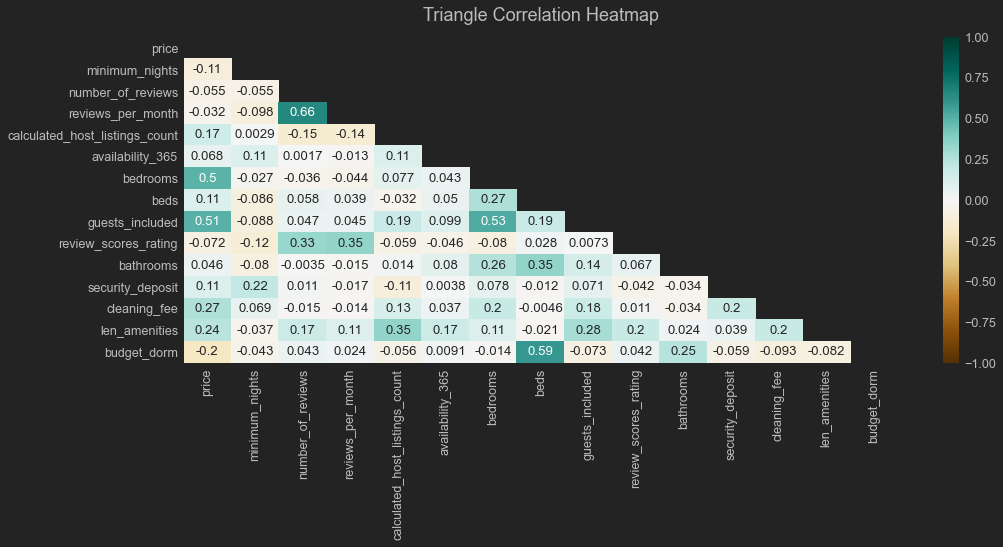

In [38]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(pricepred.corr(), dtype=np.bool))
heatmap = sns.heatmap(pricepred.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# DATA MANIPULATION 

## Budget Dorm

In [39]:
def budget_dorm(col):
    if (col['price']<=100) and (col['beds']>=3):
        return 1
    else:
        return 0

In [40]:
pricepred['budget_dorm']=pricepred[['beds','price']].apply(budget_dorm,axis=1)

In [41]:
pricepred['budget_dorm'].value_counts()

0    6708
1     246
Name: budget_dorm, dtype: int64

In [42]:
df_dummy = pricepred.copy()

## PROPERTY TYPE

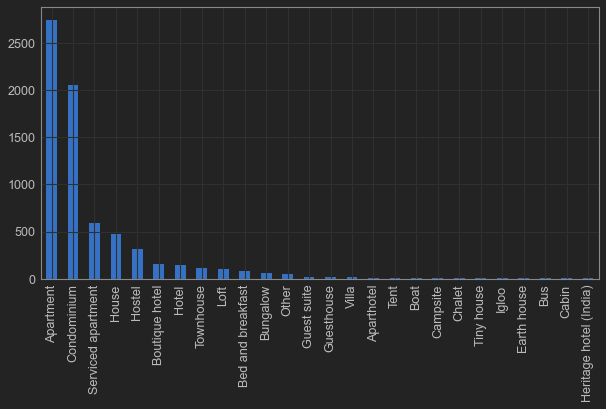

In [43]:
plt.figure(figsize=(10,5))
df_dummy["property_type"].value_counts().plot(kind="bar")

In [44]:
df_dummy['property_type'].nunique()

26

menggabungkan house, townhouse, tinyhouse, guesthouse, earth house sebagai house

In [45]:
df_dummy["property_type"] = df_dummy["property_type"].apply(lambda x: "House" if x=="Townhouse" or x=="Tiny house" or x=="Guesthouse" or x=="Earth house" or x=="Loft" or x=="Bungalow" else x)

In [46]:
df_dummy["property_type"] = df_dummy["property_type"].apply(lambda x: "Apartment" if x=="Serviced apartment" or x=="Aparthotel" else x)

In [47]:
df_dummy["property_type"] = df_dummy["property_type"].apply(lambda x: "Hotel" if x== "Bed and breakfast" else x)

In [48]:
df_dummy["property_type"] = df_dummy["property_type"].apply(lambda x: "Condominium" if x== "Guest suite" else x)

In [49]:
to_other = []
for x in df_dummy["property_type"].unique():
    if sum(df_dummy["property_type"] == x) < sum(df_dummy["property_type"] == "Other"):
        to_other.append(x)
to_other

['Villa',
 'Chalet',
 'Boat',
 'Cabin',
 'Tent',
 'Campsite',
 'Bus',
 'Heritage hotel (India)',
 'Igloo']

In [50]:
df_dummy["property_type"] = df_dummy["property_type"].apply(lambda x: "Other" if x in to_other else x)

In [51]:
df_dummy['property_type'].nunique()

7

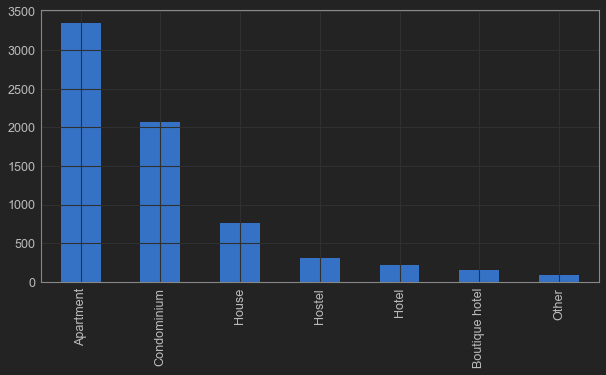

In [52]:
plt.figure(figsize=(10,5))
df_dummy["property_type"].value_counts().plot(kind="bar")

## Set Dummies (for Categorical)

In [53]:
df_dummy = pd.get_dummies(data=df_dummy, columns=['neighbourhood_group',  'room_type',
                                                   'host_is_superhost', 'property_type', 'instant_bookable',
                                                   ])

In [54]:
df_dummy.head(1)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,len_amenities,budget_dorm,neighbourhood_group_Central Region,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t,property_type_Apartment,property_type_Boutique hotel,property_type_Condominium,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Other,instant_bookable_f,instant_bookable_t
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,84,180,1,0.01,2,365,1,1,1,94.0,1,0.0,0.0,8,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0


In [55]:
df_dummy.shape

(6954, 35)

In [56]:
df_dummy.head(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,len_amenities,budget_dorm,neighbourhood_group_Central Region,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t,property_type_Apartment,property_type_Boutique hotel,property_type_Condominium,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Other,instant_bookable_f,instant_bookable_t
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,84,180,1,0.01,2,365,1,1,1,94.0,1,0.0,0.0,8,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
50646,80,90,18,0.24,1,365,1,1,2,91.0,1,0.0,0.0,12,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0


In [57]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 49091 to 43880119
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   price                                  6954 non-null   int64  
 1   minimum_nights                         6954 non-null   int64  
 2   number_of_reviews                      6954 non-null   int64  
 3   reviews_per_month                      6954 non-null   float64
 4   calculated_host_listings_count         6954 non-null   int64  
 5   availability_365                       6954 non-null   int64  
 6   bedrooms                               6954 non-null   int32  
 7   beds                                   6954 non-null   int32  
 8   guests_included                        6954 non-null   int64  
 9   review_scores_rating                   6954 non-null   float64
 10  bathrooms                              6954 non-null   int32  
 

## Transforming To Logarithmic Scale

Saya akan transform numerical yang continous ke log scale karena seperti yang dilihat pada file EDA, data tersebut tidak terdistribusi normal

In [61]:
pricelog1p = df_dummy.copy()

In [62]:
pricelog1p['price'].skew()

0.8404886108178793

dari nilai skewnes tersebut, dapat ditarik kesimpulan bawah memiliki skewness positif  dan bersifat moderate, sehingga untuk cara transformasinya menggunakan transformasi log

In [63]:
pricelog1p['price'] = np.log1p(pricelog1p['price'])

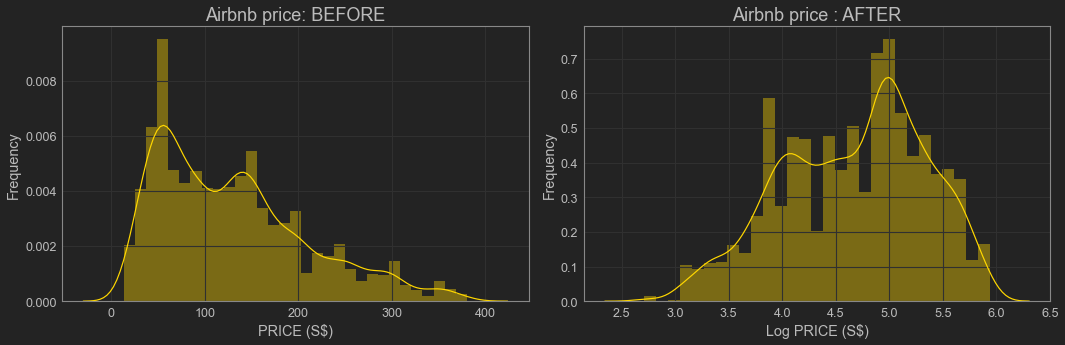

In [64]:
figure, axes = plt.subplots(1, 2,figsize=(15,5))

a = sns.distplot(df_dummy['price'],ax=axes[0],color='gold')
a.set(xlabel='PRICE (S$)', ylabel='Frequency')
a.set_title("Airbnb price: BEFORE",fontsize= 18)

b= sns.distplot(pricelog1p['price'],ax=axes[1],color='gold')
b.set(xlabel='Log PRICE (S$)', ylabel='Frequency')
b.set_title("Airbnb price : AFTER",fontsize= 18)

plt.tight_layout()

# Normality Test

In [67]:
import statsmodels.api as sm
from scipy import stats

In [68]:
print(stats.shapiro(pricelog1p['price']))

ShapiroResult(statistic=0.9787811636924744, pvalue=5.833897589119676e-31)


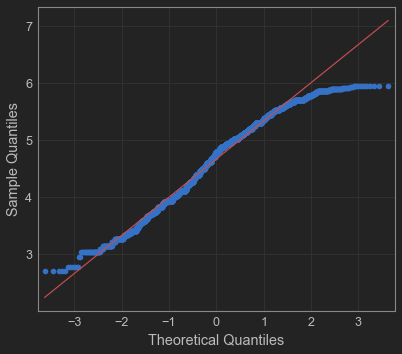

In [69]:
fig = sm.qqplot(pricelog1p['price'],line='s')
plt.show()

In [70]:
from scipy import stats
stat, p = stats.jarque_bera(pricelog1p['price'])
stat, p

(236.2630686479212, 0.0)

Setelah dilakukan transformasi, dan pengujian 'Normality Test', p-values harga airbnb < 0.05 yang menandakan bahwa data ini tidak terdistribusi normal. Hal ini akan sangat berpengaruh terhadap akurasi Machine Learning terutama linear regression. Tetapi transformasi yang dilakukan sudah cukup mendekati data untuk terdistribusi normal

In [71]:
pricelog1p['minimum_nights']=pricelog1p['minimum_nights'].apply(lambda x:np.log1p(x))
pricelog1p['number_of_reviews']=pricelog1p['number_of_reviews'].apply(lambda x:np.log1p(x))
pricelog1p['calculated_host_listings_count']=pricelog1p['calculated_host_listings_count'].apply(lambda x:np.log1p(x))
pricelog1p['availability_365']=pricelog1p['availability_365'].apply(lambda x:np.log1p(x))#perhatian
pricelog1p['bedrooms']=pricelog1p['bedrooms'].apply(lambda x:np.log1p(x))
pricelog1p['beds']=pricelog1p['beds'].apply(lambda x:np.log1p(x))
pricelog1p['guests_included']=pricelog1p['guests_included'].apply(lambda x:np.log1p(x))
pricelog1p['review_scores_rating']=pricelog1p['review_scores_rating'].apply(lambda x:np.log1p(x))
pricelog1p['bathrooms']=pricelog1p['bathrooms'].apply(lambda x:np.log1p(x))
pricelog1p['security_deposit']=pricelog1p['security_deposit'].apply(lambda x:np.log1p(x))
pricelog1p['cleaning_fee']=pricelog1p['cleaning_fee'].apply(lambda x:np.log1p(x))
pricelog1p['len_amenities']=pricelog1p['len_amenities'].apply(lambda x:np.log1p(x))
# pricelog1p['latitude']=pricelog1p['latitude'].apply(lambda x:np.log1p(x))
# pricelog1p['longitude']=pricelog1p['longitude'].apply(lambda x:np.log1p(x))
# pricelog1p['reviews_per_month']=pricelog1p['reviews_per_month'].apply(lambda x:np.log1p(x))

In [72]:
pricelog1p.describe().T

,count,mean,std,min,25%,50%,75%,max
price,6954.0,4.669340,0.668987,2.708050,4.110874,4.787492,5.176150,5.942799
minimum_nights,6954.0,2.059463,1.307128,0.693147,1.098612,1.609438,2.944439,5.902633
number_of_reviews,6954.0,1.306556,1.448368,0.000000,0.000000,0.693147,2.197225,5.916202
reviews_per_month,6954.0,0.472921,1.116076,0.000000,0.000000,0.090000,0.430000,28.720000
calculated_host_listings_count,6954.0,2.587740,1.624588,0.693147,1.098612,2.397895,3.970292,5.817111
availability_365,6954.0,3.866914,2.509558,0.000000,0.693147,5.204007,5.897154,5.902633
bedrooms,6954.0,0.760404,0.324752,0.000000,0.693147,0.693147,0.693147,2.197225
beds,6954.0,0.931227,0.443082,0.000000,0.693147,0.693147,1.098612,4.077537
guests_included,6954.0,0.948694,0.370857,0.693147,0.693147,0.693147,1.098612,2.833213
review_scores_rating,6954.0,2.710947,2.209053,0.000000,0.000000,4.394449,4.574711,4.615121


# Filtering Data

In [73]:
pricepredict = pricelog1p.copy()

In [74]:
pricepredict.head(1)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,len_amenities,budget_dorm,neighbourhood_group_Central Region,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t,property_type_Apartment,property_type_Boutique hotel,property_type_Condominium,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Other,instant_bookable_f,instant_bookable_t
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,4.442651,5.198497,0.693147,0.01,1.098612,5.902633,0.693147,0.693147,0.693147,4.553877,0.693147,0.0,0.0,2.197225,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0


saya akan mendrop salah satu dari kolom number_of_review atau review_per_month karena korelasi antar keduanya tinggi. Terdeteksi sebagai multicollinearity

In [75]:
# pricepredict.drop(columns = 'number_of_reviews',inplace= True)

In [76]:
pricepredict.drop(columns = 'reviews_per_month',inplace= True)

In [77]:
# pricepredict.drop(columns = 'neighbourhood',inplace= True)

In [78]:
pricepredict.shape

(6954, 34)

# Base Model Predict

In [79]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [80]:
y = pricepredict['price']
X = pricepredict.drop(['price'],axis = 1)

In [81]:
X.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,len_amenities,budget_dorm,neighbourhood_group_Central Region,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t,property_type_Apartment,property_type_Boutique hotel,property_type_Condominium,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Other,instant_bookable_f,instant_bookable_t
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,5.198497,0.693147,1.098612,5.902633,0.693147,0.693147,0.693147,4.553877,0.693147,0.000000,0.000000,2.197225,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
50646,4.510860,2.944439,0.693147,5.902633,0.693147,0.693147,1.098612,4.521789,0.693147,0.000000,0.000000,2.564949,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
56334,1.945910,3.044522,1.098612,5.902633,0.693147,0.693147,0.693147,4.595120,0.693147,0.000000,0.000000,2.302585,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
71609,4.510860,3.044522,2.197225,5.902633,1.098612,1.386294,1.609438,4.499810,0.693147,5.634790,4.043051,3.332205,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
71896,4.510860,3.218876,2.197225,5.902633,0.693147,0.693147,0.693147,4.430817,0.000000,4.941642,3.367296,3.218876,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1


## CROSS VALIDATION

In [89]:
perform=[]

In [90]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split

In [91]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 5))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 5))
    return(rmse)

## Splitting

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=42)

In [94]:
# X_train, X_test, y_train, y_test = train_test_split(data_price, target_price, test_size=0.2,random_state=42)

In [95]:
X_train.shape, X_test.shape

((4867, 33), (2087, 33))

In [96]:
X_train.columns

Index(['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'bedrooms', 'beds', 'guests_included',
       'review_scores_rating', 'bathrooms', 'security_deposit', 'cleaning_fee',
       'len_amenities', 'budget_dorm', 'neighbourhood_group_Central Region',
       'neighbourhood_group_East Region', 'neighbourhood_group_North Region',
       'neighbourhood_group_North-East Region',
       'neighbourhood_group_West Region', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'host_is_superhost_f', 'host_is_superhost_t',
       'property_type_Apartment', 'property_type_Boutique hotel',
       'property_type_Condominium', 'property_type_Hostel',
       'property_type_Hotel', 'property_type_House', 'property_type_Other',
       'instant_bookable_f', 'instant_bookable_t'],
      dtype='object')

# BASE MODEL

## Linear Model

In [97]:
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

In [98]:
from sklearn.linear_model import LinearRegression, RidgeCV

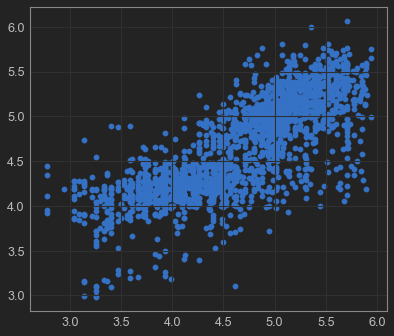

In [99]:
linear = LinearRegression()
linear.fit (X_train,y_train)
price_pred = linear.predict(X_test)
plt.scatter(y_test,price_pred)

In [100]:
MAE_lr = mean_absolute_error(y_test, price_pred)
MSE_lr = mean_squared_error(y_test, price_pred)
RMSE_lr = np.sqrt(MSE_lr)
R2_lr = r2_score(y_test, price_pred)
R2_lrtrain = linear.score(X_train,y_train)
print(f"Training: {R2_lrtrain}")
print(f"Testing: {R2_lr}")

Training: 0.6180828222459138
Testing: 0.6014095078982746


In [101]:
lrdata = pd.DataFrame({'Actual':y_test, 'Prediction': price_pred})
lrdata.head(5)

,Actual,Prediction
id,,
39612331,5.476464,5.066291
39612598,3.688879,4.201308
19799435,3.931826,4.387239
823571,5.634790,4.431145
19286135,4.912655,5.208005


In [103]:
Linear_RMSEtrain = rmse_cv_train(linear).mean()
Linear_RMSEtest = rmse_cv_test(linear).mean()

In [104]:
print("RMSE on Training set :", Linear_RMSEtrain)
print("RMSE on Test set :", Linear_RMSEtest)

RMSE on Training set : 0.4150756715737485
RMSE on Test set : 0.4324781431209236


In [106]:
perform.append(['linear base', Linear_RMSEtrain, Linear_RMSEtest])

### RESIDUAL PLOT

In [112]:
residual = np.expm1(y_test) - np.expm1(price_pred)

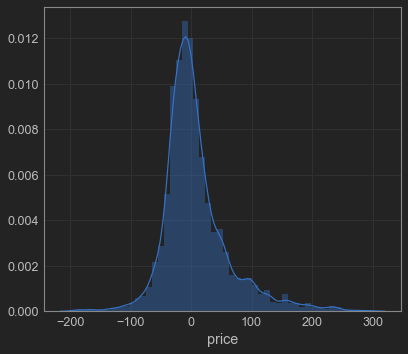

In [113]:
# residual = price_pred - y_test
sns.distplot(residual)

### Residual Yellowbrick

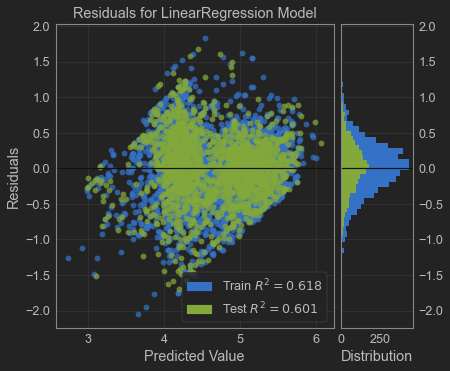

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(linear)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

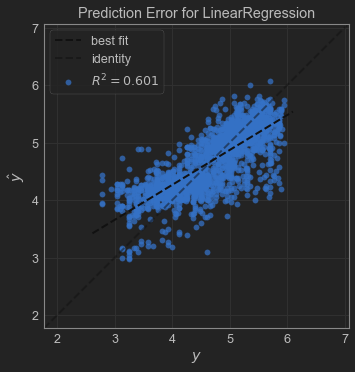

In [116]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(linear)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

## Ridge Linear Regression

In [117]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

# print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
# print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
predict_train_ridge = ridge.predict(X_train)
predict_test_ridge = ridge.predict(X_test)

Best alpha : 3.0
Try again for more precision with alphas centered around 3.0
Best alpha : 2.55


In [118]:
MAE_ridge = mean_absolute_error(y_test, predict_test_ridge)
MSE_ridge = mean_squared_error(y_test, predict_test_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)
R2_ridge = r2_score(y_test, predict_test_ridge)
R2_ridgetrain =ridge.score(X_train,y_train)
print(f"Training: {R2_ridgetrain}")
print(f"Testing: {R2_ridge}")

Training: 0.6180547216023398
Testing: 0.6014626212697058


In [122]:
Ridge_RMSEtrain = rmse_cv_train(ridge).mean()
Ridge_RMSEtest = rmse_cv_test(ridge).mean()

In [123]:
print("RMSE on Training set :", Linear_RMSEtrain)
print("RMSE on Test set :", Linear_RMSEtest)

RMSE on Training set : 0.4150756715737485
RMSE on Test set : 0.4324781431209236


In [126]:
perform.append(['Ridge', Ridge_RMSEtrain, Ridge_RMSEtest])

In [127]:
lrdata = pd.DataFrame({'Actual':y_test, 'Prediction': predict_test_ridge})
lrdata.head(5)

,Actual,Prediction
id,,
39612331,5.476464,5.067746
39612598,3.688879,4.201946
19799435,3.931826,4.386759
823571,5.634790,4.430636
19286135,4.912655,5.205086


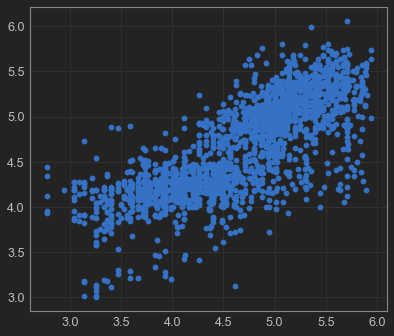

In [128]:
plt.scatter(y_test,predict_test_ridge)

Ridge picked 33 features and eliminated the other 0 features


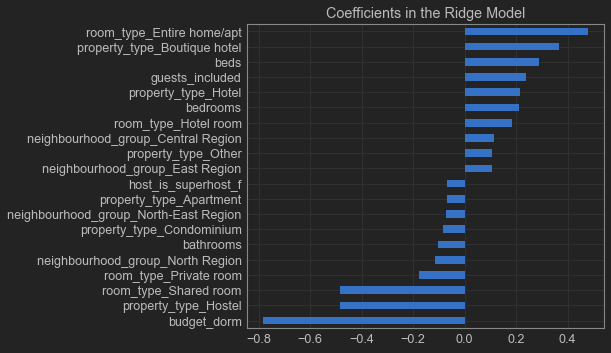

In [129]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

### Residual Plot

In [134]:
ridgeresidual = np.expm1(y_test) - np.expm1(predict_test_ridge)

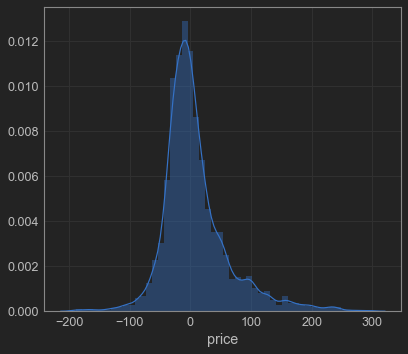

In [135]:
sns.distplot(ridgeresidual)

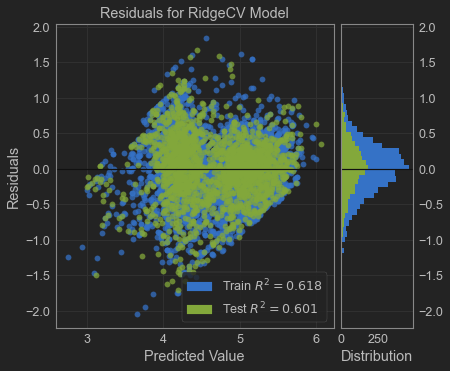

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

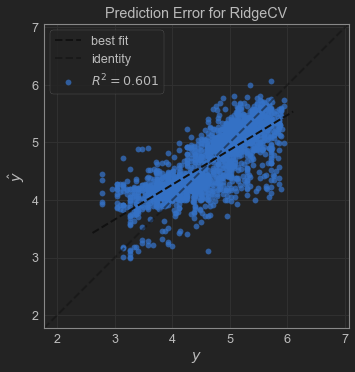

In [137]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

## ElasticNet

In [138]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [139]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 3)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 3)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 3)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

# print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
# print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
predict_train_en = elasticNet.predict(X_train)
predict_test_en = elasticNet.predict(X_test)

Best l1_ratio : 0.1
Best alpha : 0.0006
Try again for more precision with l1_ratio centered around 0.1
Best l1_ratio : 0.085
Best alpha : 0.0006
Now try again for more precision on alpha, with l1_ratio fixed at 0.085 and alpha centered around 0.0006
Best l1_ratio : 0.085
Best alpha : 0.00081


In [184]:
MAE_elas = mean_absolute_error(y_test, predict_test_en)
MSE_elas = mean_squared_error(y_test, predict_test_en)
RMSE_elas = np.sqrt(MSE_elas)
R2_elas = r2_score(y_test, predict_test_en)
R2_elastrain = elasticNet.score(X_train,y_train)
print(f"Training: {R2_elastrain}")
print(f"Testing: {R2_elas}")

Training: 0.6180013699770095
Testing: 0.6014622707954216


In [185]:
Elas_RMSEtrain = rmse_cv_train(elasticNet).mean()
Elas_RMSEtest = rmse_cv_test(elasticNet).mean()

In [186]:
print("RMSE on Training set :", Elas_RMSEtrain)
print("RMSE on Test set :", Elas_RMSEtest)

RMSE on Training set : 0.4150691422531124
RMSE on Test set : 0.432287555365556


In [187]:
perform.append(['Elasticnet', Elas_RMSEtrain, Elas_RMSEtest])

### Residual Plot

In [153]:
enresidual = np.expm1(y_test) - np.expm1(predict_test_en)

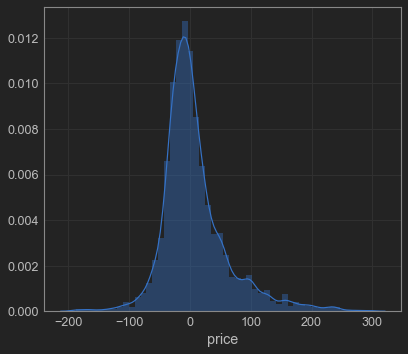

In [154]:
sns.distplot(enresidual)

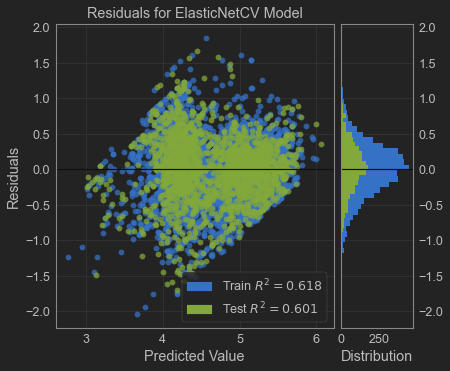

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(elasticNet)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

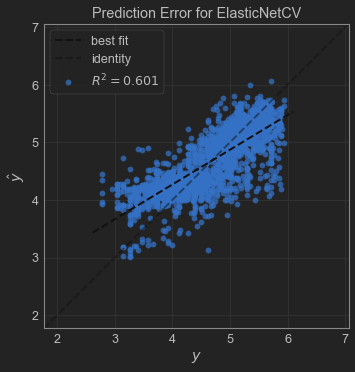

In [156]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(elasticNet)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

## RANDOM FOREST REGRESSOR

In [148]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [157]:
prediction_rf = rf.predict(X_test)

In [158]:
MAE_rf = mean_absolute_error(y_test, prediction_rf)
MSE_rf = mean_squared_error(y_test, prediction_rf)
RMSE_rf = np.sqrt(MSE_rf)
R2_rf = r2_score(y_test, prediction_rf)
R2_rftrain = rf.score(X_train,y_train)
print(f"Training: {R2_rftrain}")
print(f"Testing: {R2_rf}")

Training: 0.9696329448704408
Testing: 0.7821191965001479


In [159]:
RF_RMSEtrain = rmse_cv_train(rf).mean()
RF_RMSEtest = rmse_cv_test(rf).mean()

In [160]:
print("RMSE on Training set :", RF_RMSEtrain.mean())
print("RMSE on Test set :", RF_RMSEtest.mean())

RMSE on Training set : 0.3103171202662685
RMSE on Test set : 0.34821185973194996


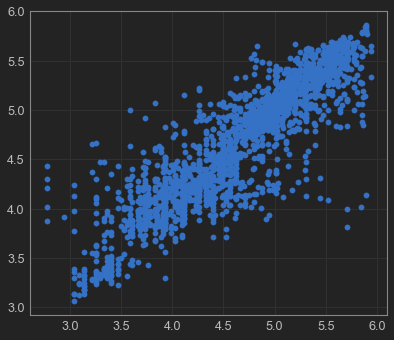

In [161]:
plt.scatter(y_test, prediction_rf)

In [162]:
lrdata = pd.DataFrame({'Actual':y_test, 'Prediction': prediction_rf})
lrdata.head(5)

,Actual,Prediction
id,,
39612331,5.476464,5.144004
39612598,3.688879,3.895525
19799435,3.931826,4.213268
823571,5.634790,5.011785
19286135,4.912655,4.961457


In [163]:
perform.append(['RANDOMFOREST1', RF_RMSEtrain, RF_RMSEtest])

### RESIDUAL PLOT

In [164]:
RFresidual = np.expm1(y_test) - np.expm1(prediction_rf)

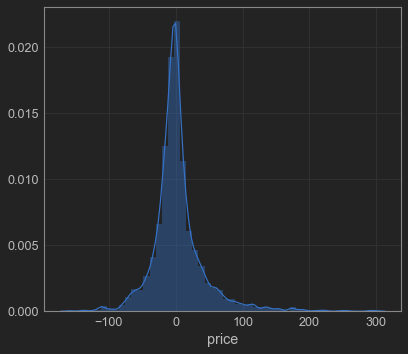

In [165]:
# RFresidual = prediction_rf - y_test
sns.distplot(RFresidual)

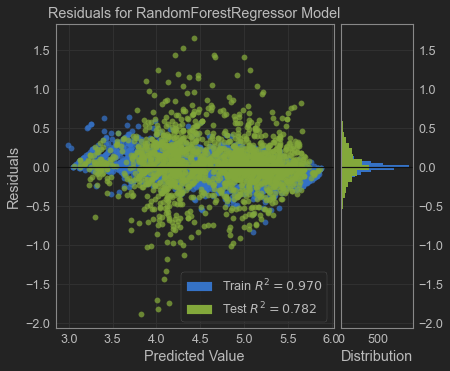

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(rf)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

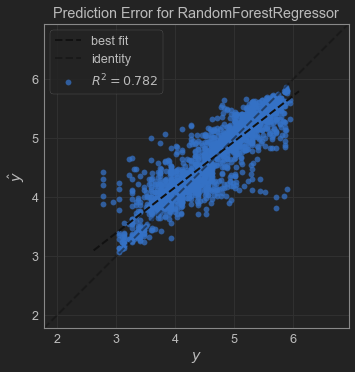

In [167]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(rf)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

## XGB REGRESSOR 

In [168]:
from xgboost import XGBRegressor

In [169]:
xgboost = XGBRegressor()#(learning_rate=0.01, n_estimators=1000, max_depth=4)

In [170]:
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [171]:
prediction_XGB = xgboost.predict(X_test)

In [172]:
MAE_xgboost = mean_absolute_error(y_test, prediction_XGB)
MSE_xgboost = mean_squared_error(y_test, prediction_XGB)
RMSE_xgboost = np.sqrt(MSE_xgboost)
R2_xgboost = r2_score(y_test, prediction_XGB)
R2_xgbtrain = xgboost.score(X_train,y_train)
print(f"Training: {R2_xgbtrain}")
print(f"Testing: {R2_xgboost}")

Training: 0.9451932661036642
Testing: 0.7795171129353892


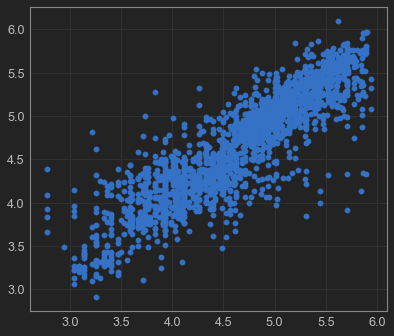

In [173]:
plt.scatter(y_test, prediction_XGB)

In [174]:
XGB_RMSEtrain = rmse_cv_train(xgboost).mean()
XGB_RMSEtest = rmse_cv_test(xgboost).mean()

In [175]:
print("RMSE on Training set :", XGB_RMSEtrain)
print("RMSE on Test set :", XGB_RMSEtest)

RMSE on Training set : 0.3286073239047765
RMSE on Test set : 0.3589267417773772


In [177]:
perform.append(['XGB1', XGB_RMSEtrain, XGB_RMSEtest])

In [178]:
lrdata = pd.DataFrame({'Actual':y_test, 'Prediction': prediction_XGB})
lrdata.head(5)

,Actual,Prediction
id,,
39612331,5.476464,5.009822
39612598,3.688879,3.843412
19799435,3.931826,4.202418
823571,5.634790,5.100134
19286135,4.912655,5.008099


### RESIDUAL PLOT

In [179]:
xgbresidual = np.expm1(y_test) - np.expm1(prediction_XGB)

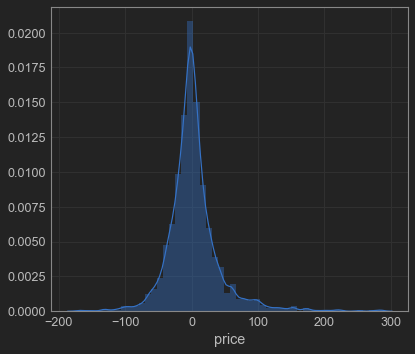

In [180]:
# xgbresidual = prediction_XGB - y_test
sns.distplot(xgbresidual)

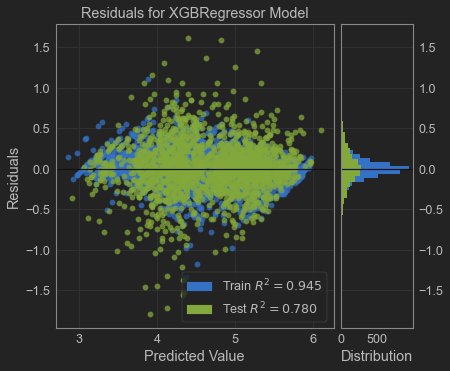

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(xgboost)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

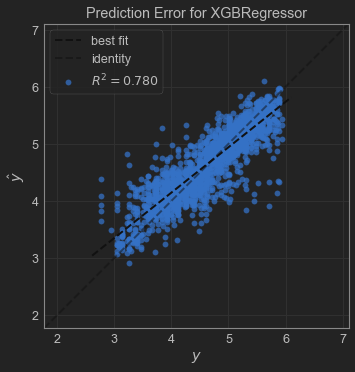

In [182]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(xgboost)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

## EVALUATION

In [188]:
datas = {
    'Base LinReg': [MAE_lr,MSE_lr,RMSE_lr,R2_lr,R2_lrtrain],
    'Ridge' : [MAE_ridge,MSE_rf,RMSE_ridge,R2_ridge,R2_ridgetrain],
    'Elasticnet' :[MAE_elas,MSE_elas,RMSE_elas,R2_elas,R2_elastrain],
    'Base RF' : [MAE_rf,MSE_rf,RMSE_rf,R2_rf,R2_rftrain],
    'Base XGB': [MAE_xgboost,MSE_xgboost,RMSE_xgboost,R2_xgboost,R2_xgbtrain]
}
pd.DataFrame(data=datas, index=['MAE','MSE','RMSE','R2','R2Train']).T.sort_values(by='R2',ascending=False)

,MAE,MSE,RMSE,R2,R2Train
Base RF,0.210917,0.099300,0.315119,0.782119,0.969633
Base XGB,0.220707,0.100486,0.316995,0.779517,0.945193
Ridge,0.319421,0.099300,0.426186,0.601463,0.618055
Elasticnet,0.319449,0.181635,0.426186,0.601462,0.618001
Base LinReg,0.319431,0.181659,0.426215,0.601410,0.618083


In [189]:
perform

[['linear base', 0.4150756715737485, 0.4324781431209236],
 ['Ridge', 0.4150680976591194, 0.43213463604177804],
 ['RANDOMFOREST1', 0.3103171202662685, 0.34821185973194996],
 ['XGB1', 0.3286073239047765, 0.3589267417773772],
 ['Elasticnet', 0.4150691422531124, 0.432287555365556]]

# TUNING MODEL


- Dari ke-lima algoritma yang saya pakai, saya membandingkan nilai R2, dan RMSE dengan CV=5, perbandingan RMSE dengan cv dan yang tidak menggunakan cv terlihat erornya semakin mengecil tapi tidak signifikan. Secara pengambilan skor dengan R2, saya melanjutkan akan tuning dengan algoritma RF dan XGB yang naturalnya akan menghasilkan overfit. Algoritma Linreg, Ridge dan Elasticnet menunjukan hasil yang tidak overfit tapi performa erornya jauh dibawah random forest dan xgboost. dapat diasumsikan bahwa eror yang tinggi tersebut kemungkinan besar karena data tidak terdistribusi normal.


- Tuning pada file ini dilakukan setelah melalui beberapa proses tuning-tuning di proses sebelumnya, sehingga parameter yang dicoba juga dengan tujuan agar model tidak overfit. 

In [208]:
performtuning = []

## RANDOM FOREST TUNING

### GridSEARCHCV

In [190]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [191]:
RF = RandomForestRegressor()

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [192]:
# param_RF_TUNED = {'algo__max_depth': [12],
#                  'algo__max_features': [14],
#                  'algo__min_samples_split': [46],
#                  'algo__n_estimators': [240],
#                  'algo__bootstrap': [True],
#                  'algo__min_samples_leaf': [23]}

<!-- # n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node
# bootstrap = method for sampling data points (with or without replacement) -->

In [193]:
param_RF = {'bootstrap': [True],
               'max_depth': [11,12],
               'max_features': [11,12],
               'min_samples_leaf': [22,23],
               'min_samples_split': [45,46],
               'n_estimators': [230,240]}

In [194]:
model_RF = GridSearchCV(estimator=RF, param_grid=param_RF, cv =5, n_jobs=-1, verbose=1)

In [195]:
model_RF.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   31.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [202]:
model_RF.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 12,
 'min_samples_leaf': 22,
 'min_samples_split': 45,
 'n_estimators': 230}

In [203]:
model_rftuned = model_RF.best_estimator_

In [204]:
rftuned_predict = model_rftuned.predict(X_test)
rftuned_predict

array([4.98020961, 3.8486865 , 4.28096465, ..., 3.72929053, 4.78106411,
       4.25058185])

In [212]:
R2_rftuned = r2_score(y_test, rftuned_predict)
R2_rftunedtrain = model_rftuned.score(X_train, y_train)
MAE_rftuned = mean_absolute_error(y_test, rftuned_predict)
MSE_rftuned = mean_squared_error(y_test, rftuned_predict)
RMSE_rftuned = np.sqrt(MSE_rftuned)

In [213]:
print(f"Training: {R2_rftunedtrain}")
print(f"Testing: {R2_rftuned}")

Training: 0.7463719033422852
Testing: 0.7140285021022668


In [214]:
RFdata = pd.DataFrame({'Actual': np.expm1(y_test), 'Prediction': np.expm1(rftuned_predict)})
RFdata.head(10)

,Actual,Prediction
id,,
39612331,238.0,144.504877
39612598,39.0,45.931379
19799435,50.0,71.310160
823571,279.0,86.680524
19286135,135.0,144.122987
2095865,64.0,61.586527
26555143,228.0,213.448453
10467184,170.0,207.366771
30167617,99.0,76.719920


In [209]:
RMSE_RFtrain = rmse_cv_train(RF).mean()
RMSE_RFtest = rmse_cv_test(RF).mean()

In [211]:
print("RMSE on Training set :", RMSE_RFtrain)
print("RMSE on Test set :", RMSE_RFtest)

RMSE on Training set : 0.3115961444058214
RMSE on Test set : 0.3520572915584673


In [210]:
performtuning.append(['random_forest1_tuned', RMSE_RFtrain,RMSE_RFtest])

## XGB

### XGB RANDOMIZEDSEARCH CV

In [215]:
XGB_Tuned = XGBRegressor()


In [218]:
param_xgb = {"learning_rate": [0.5,1,1.5],
             "max_depth": [12,15],
             "min_child_weight": [0.5,1],
             "gamma": [1,2],
             "colsample_bytree": [1,2]}

In [219]:
model_Tuned_XGB = RandomizedSearchCV(estimator=XGB_Tuned, param_distributions=param_xgb, cv= 5, n_jobs= -1, verbose= 1)
model_Tuned_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [220]:
model_Tuned_XGB.best_params_

{'min_child_weight': 0.5,
 'max_depth': 15,
 'learning_rate': 0.5,
 'gamma': 2,
 'colsample_bytree': 1}

In [221]:
model_tuned_XGB = model_Tuned_XGB.best_estimator_
y_tuned_xgb = model_tuned_XGB.predict(X_test)
R2_tuned_XGB = r2_score(y_test, y_tuned_xgb)
R2_tunedXGBtrain = xgboost.score(X_train, y_train)
MAE_Tuned_XGB = mean_absolute_error(y_test, y_tuned_xgb)
MSE_Tuned_XGB = mean_squared_error(y_test, y_tuned_xgb)
RMSE_Tuned_XGB = np.sqrt(MSE_Tuned_XGB)
print(f"Training: {R2_tunedXGBtrain}")
print("Testing:", r2_score(y_test, y_tuned_xgb))

Training: 0.9451932661036642
Testing: 0.7444220896888445


In [223]:
RMSE_XGB2train = rmse_cv_train(model_tuned_XGB).mean()
RMSE_XGB2test = rmse_cv_test(model_tuned_XGB).mean()

In [224]:
print("RMSE on Training set :", RMSE_XGB2train)
print("RMSE on Test set :", RMSE_XGB2test)

RMSE on Training set : 0.3454476273485886
RMSE on Test set : 0.38692931281077436


In [225]:
performtuning.append(['XGB tuned', RMSE_XGB2train,RMSE_XGB2test])

# COMBINED EVA

In [561]:
datas = {
    'Base LinReg': [MAE_lr,MSE_lr,RMSE_lr,R2_lr,R2_lrtrain],
    'Ridge' : [MAE_ridge,MSE_rf,RMSE_ridge,R2_ridge,R2_ridgetrain],
    'Elasticnet' :[MAE_elas,MSE_elas,RMSE_elas,R2_elas,R2_elastrain],
    'Base RF' : [MAE_rf,MSE_rf,RMSE_rf,R2_rf,R2_rftrain],
    'Base XGB': [MAE_xgboost,MSE_xgboost,RMSE_xgboost,R2_xgboost,R2_xgbtrain],
    'RF TUNED': [MAE_rftuned,MSE_rftuned,RMSE_rftuned,R2_rftuned,R2_rftunedtrain],
    'XGB TUNED': [MAE_Tuned_XGB,MSE_Tuned_XGB,RMSE_Tuned_XGB,R2_tuned_XGB,R2_tunedXGBtrain]

}
pd.DataFrame(data=datas, index=['MAE','MSE','RMSE','R2','R2train']).T.sort_values(by='R2',ascending=False)


,MAE,MSE,RMSE,R2,R2train
Base RF,0.211307,0.099283,0.315092,0.782156,0.745841
Base XGB,0.220707,0.100486,0.316995,0.779517,0.945193
XGB TUNED,0.243842,0.116359,0.341114,0.744689,0.945193
RF TUNED,0.261263,0.130558,0.361328,0.713534,0.745841
Ridge,0.319421,0.099283,0.426186,0.601463,0.618055
Elasticnet,0.319449,0.181635,0.426186,0.601462,0.618001
Base LinReg,0.319431,0.181659,0.426215,0.601410,0.618083


In [226]:
performtuning

[['random_forest1_tuned', 0.3115961444058214, 0.3520572915584673],
 ['XGB tuned', 0.3454476273485886, 0.38692931281077436]]

# BEST MODEL (RF_TUNED)

In [227]:
RF_TUNED = RandomForestRegressor(max_depth=12,
                                 min_samples_split=46,
                                 min_samples_leaf=23,
                                 n_estimators=240,
                                 max_features=14,
                                 bootstrap=True,
                                 )

In [228]:
RF_TUNED.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features=14, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=23,
                      min_samples_split=46, min_weight_fraction_leaf=0.0,
                      n_estimators=240, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [229]:
RF_TUNED_PREDICT = RF_TUNED.predict(X_test)

In [230]:
R2_rftuned = r2_score(y_test, RF_TUNED_PREDICT)
MAE_rftuned = mean_absolute_error(y_test, RF_TUNED_PREDICT)
MSE_rftuned = mean_squared_error(y_test, RF_TUNED_PREDICT)
RMSE_rftuned = np.sqrt(MSE_rftuned)
print(f"Training: {RF_TUNED.score(X_train, y_train)}")
print(f"Testing: {R2_rftuned}")

Training: 0.7463524622791502
Testing: 0.7139717685947466


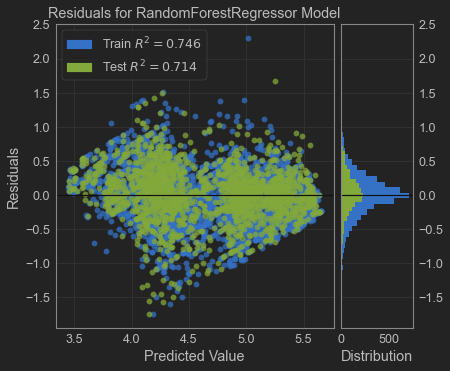

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(RF_TUNED)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

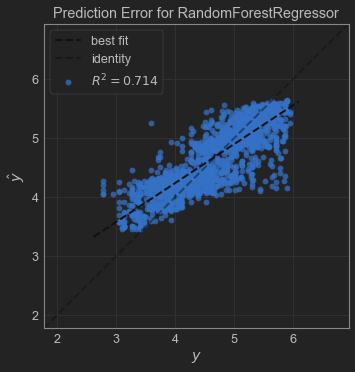

In [232]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(RF_TUNED)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

# CONCLUSION

In [234]:
datas = {
    'Base LinReg': [MAE_lr,MSE_lr,RMSE_lr,R2_lr,R2_lrtrain],
    'Ridge' : [MAE_ridge,MSE_rf,RMSE_ridge,R2_ridge,R2_ridgetrain],
    'Elasticnet' :[MAE_elas,MSE_elas,RMSE_elas,R2_elas,R2_elastrain],
    'Base RF' : [MAE_rf,MSE_rf,RMSE_rf,R2_rf,R2_rftrain],
    'Base XGB': [MAE_xgboost,MSE_xgboost,RMSE_xgboost,R2_xgboost,R2_xgbtrain],
    'RF TUNED': [MAE_rftuned,MSE_rftuned,RMSE_rftuned,R2_rftuned,R2_rftunedtrain],
    'XGB TUNED': [MAE_Tuned_XGB,MSE_Tuned_XGB,RMSE_Tuned_XGB,R2_tuned_XGB,R2_tunedXGBtrain]

}
pd.DataFrame(data=datas, index=['MAE','MSE','RMSE','R2','R2train']).T.sort_values(by='R2',ascending=False)


,MAE,MSE,RMSE,R2,R2train
Base RF,0.210917,0.099300,0.315119,0.782119,0.969633
Base XGB,0.220707,0.100486,0.316995,0.779517,0.945193
XGB TUNED,0.245072,0.116480,0.341292,0.744422,0.945193
RF TUNED,0.260711,0.130358,0.361052,0.713972,0.746372
Ridge,0.319421,0.099300,0.426186,0.601463,0.618055
Elasticnet,0.319449,0.181635,0.426186,0.601462,0.618001
Base LinReg,0.319431,0.181659,0.426215,0.601410,0.618083


Dari perbandingan 5 algoritma, saya melakukan hyperparameter tuning untuk dua algoritma terbaik yaitu RandomforestRegressor dan  XGBRegressor. Setelah proses Tuning, score R2 tertinggi oleh XGB Tuned tetapi model overfit.

- Dengan hasil yang lebih baik dan tidak overfit, saya memilih RF_Tuned Sebagai best model.

# Model Testing

In [590]:
pricepredict.head(1)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,len_amenities,budget_dorm,neighbourhood_group_Central Region,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t,property_type_Apartment,property_type_Boutique hotel,property_type_Condominium,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Other,instant_bookable_f,instant_bookable_t
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,4.442651,5.198497,0.693147,1.098612,5.902633,0.693147,0.693147,0.693147,4.553877,0.693147,0.0,0.0,2.197225,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0


In [591]:
data_baru = [{'minimum_nights': 10,
              'number_of_reviews': 20,
              'calculated_host_listings_count': 1,
              'availability_365':6,
              'bedrooms':3,
              'beds':5,
              'guests_included':5,
              'review_scores_rating':100,
              'bathrooms':2,
              'security_deposit':50,
              'cleaning_fee':50,
              'len_amenities':12,
              'budget_dorm':1,
              'neighbourhood_group_Central Region':1,
              'neighbourhood_group_East Region':0,
              'neighbourhood_group_North Region':0,
              'neighbourhood_group_North-East Region':0,
              'neighbourhood_group_West Region':0,
              'room_type_Entire home/apt':1,
              'room_type_Hotel room':0,
              'room_type_Private room':0,
              'room_type_Shared room':0,
              'host_is_superhost_f':0,
              'host_is_superhost_t':1,
              'property_type_Apartment':1,
             'property_type_Boutique hotel':0,
              'property_type_Condominium':0,
              'property_type_Hostel':0,
              'property_type_Hotel':0,
              'property_type_House':0,
             'property_type_Other':0,
              'instant_bookable_f':0,
              'instant_bookable_t':1

              }]

In [592]:
percobaan_1 = pd.DataFrame(data_baru, index=[1])
percobaan_1

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,len_amenities,budget_dorm,neighbourhood_group_Central Region,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t,property_type_Apartment,property_type_Boutique hotel,property_type_Condominium,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Other,instant_bookable_f,instant_bookable_t
1,10,20,1,6,3,5,5,100,2,50,50,12,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1


In [586]:
# predicts = pd.DataFrame(data = [['North Region', 'Private room', 20, 20, 30, 12, 't', 'Apartment', 4, 3, 5, 80, 't', 3, 10, 10, 12,1]], columns=['neighbourhood_group','room_type','minimum_nights','reviews_per_month','calculated_host_listings_count','availability_365','host_is_superhost','property_type','bedrooms','beds','guests_included','review_scores_rating','instant_bookable','bathrooms','security_deposit', 'cleaning_fee','len_amenities','budget_dorm'])


In [587]:
model = joblib.load('ModelAirbnbFINAL')

In [593]:
pred = model.predict(percobaan_1)

In [598]:
print("your expected price is S$",(np.expm1(pred)[0]).round(2))

your expected price is S$ 212.63


# DEPLOYMENT

In [580]:
import joblib

In [582]:
joblib.dump(RF_TUNED,'ModelAirbnbFINAL')

['ModelAirbnbFINAL']

# REFERENCES

- https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f
- **BAYESIAN** : 
    - https://github.com/fmfn/BayesianOptimization
    - https://www.kaggle.com/willkoehrsen/automated-model-tuning
    
    https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

- https://medium.com/@ODSC/optimizing-hyperparameters-for-random-forest-algorithms-in-scikit-learn-d60b7aa07ead